In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
print(os.listdir(("/content/drive/My Drive/Colab_Project/glaucoma")))

['test', 'train']


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (256,256, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
# print(train_datagen)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab_Project/glaucoma/train',
target_size = (256,256),
batch_size = 32,
class_mode = 'binary')
# print(test_datagen)
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab_Project/glaucoma/test',
target_size = (256,256),
batch_size = 32,
class_mode = 'binary')

Found 455 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


In [0]:
batch_size=32
model_info=classifier.fit_generator(training_set,
steps_per_epoch = 455/batch_size,
epochs = 30,
validation_data = test_set,
validation_steps = 30/batch_size)

Epoch 1/30
15/14 [===============================] - 10s 689ms/step - loss: 1.0452 - accuracy: 0.5626 - val_loss: 0.6331 - val_accuracy: 0.6875
Epoch 2/30
15/14 [===============================] - 10s 680ms/step - loss: 0.5588 - accuracy: 0.7143 - val_loss: 0.6265 - val_accuracy: 0.5312
Epoch 3/30
15/14 [===============================] - 6s 385ms/step - loss: 0.4650 - accuracy: 0.7626 - val_loss: 0.6195 - val_accuracy: 0.7188
Epoch 4/30
15/14 [===============================] - 8s 561ms/step - loss: 0.5318 - accuracy: 0.7385 - val_loss: 0.4525 - val_accuracy: 0.8438
Epoch 5/30
15/14 [===============================] - 9s 589ms/step - loss: 0.4788 - accuracy: 0.7736 - val_loss: 0.4961 - val_accuracy: 0.7812
Epoch 6/30
15/14 [===============================] - 9s 567ms/step - loss: 0.4347 - accuracy: 0.7912 - val_loss: 0.6898 - val_accuracy: 0.6562
Epoch 7/30
15/14 [===============================] - 9s 578ms/step - loss: 0.4876 - accuracy: 0.7824 - val_loss: 0.5732 - val_accuracy: 0.71

In [0]:
### Performance evaluation
#########################
score = classifier.evaluate_generator(test_set,40/batch_size)
print(" Total: ", len(test_set.filenames))
print("Loss: ", score[0], "Accuracy: ", score[1])
#print("Accuracy = ",score[1])

 Total:  64
Loss:  0.14385752379894257 Accuracy:  0.9375


In [0]:
classifier.save('/content/drive/My Drive/Colab_Project/glaucoma/Gmodel.h5')

In [0]:
import os
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image
import numpy as np
import cv2

In [0]:
target_size = (256,256)
model=load_model('/content/drive/My Drive/Colab_Project/glaucoma/Gmodel.h5')
print("model loaded")


model loaded


In [0]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/Colab_Project/glaucoma/test/class1/Im263.jpg', target_size = (256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
 print("Glaucoma")
else:
 print("Not Glaucoma")


Glaucoma


In [0]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/Colab_Project/glaucoma/test/class0/Im181.jpg', target_size = (256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
 print("Glaucoma")
else:
 print("Not Glaucoma")


Not Glaucoma


In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
plt.style.use('fivethirtyeight')
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['binary_accuracy'])+1),model_history.history['acc'],metrics="binary_accuracy")
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

KeyError: ignored

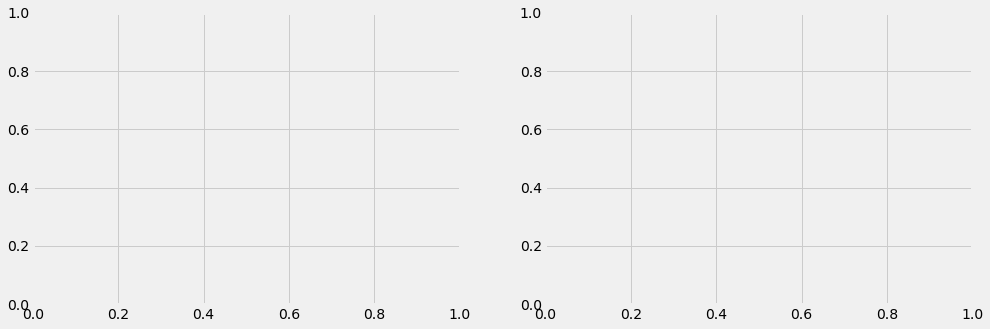

In [0]:
plot_model_history(model_info)